$ sudo pip install networkx

https://networkx.github.io/documentation/networkx-1.9.1/index.html  
https://networkx.github.io/documentation/networkx-1.9.1/_downloads/networkx_tutorial.pdf  
http://networkx.readthedocs.io/en/latest/

기타 참고할 만한 사이트  
http://stackoverflow.com/questions/15055379/networkx-layout  
http://stackoverflow.com/questions/24636015/networkx-change-node-size-based-on-list-or-dictionary-value  
http://igraph.org/python/doc/tutorial/tutorial.html

탐색 방법
- 깊이 우선 탐색
- 넓이 우선 탐색

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import networkx as net

In [3]:
o = net.Graph()
o

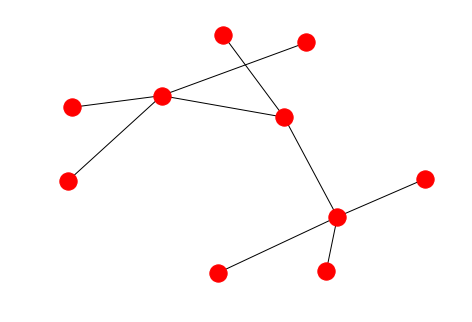

In [11]:
o.add_edge('Conrad', 'Mary')
o.add_edge('Conrad', 'Cindy')
o.add_edge('Conrad', 'Alice')
o.add_edge('Alice', 'Brad')
o.add_edge('Alice', 'Angie')
o.add_edge('Alice', 'Jim')
o.add_edge('Cindy', 'Samuel')
o.add_edge('Cindy', 'Dave')
o.add_edge('Cindy', 'Frida')
net.draw(o)

In [29]:
a = net.Graph()
a

In [23]:
a.add_edge('Cindy', 'Samuel')
a.add_edge('Cindy', 'Conrad')
a.add_edge('Samuel', 'Frida')
a.add_edge('Conrad', 'Frida')
a.add_edge('Alice', 'Frida')
a.add_edge('Angie', 'Frida')
a.add_edge('Dave', 'Frida')

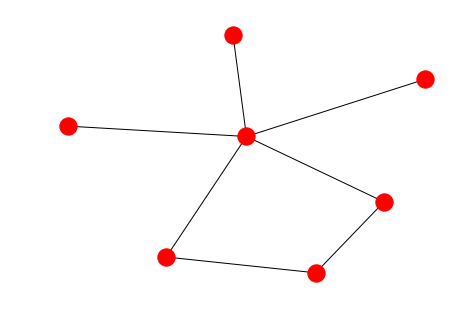

In [24]:
net.draw(a)

# edge, node 추가하기

In [58]:
b = net.Graph()

In [59]:
b.add_edge(1, 2)
b.add_node(4)

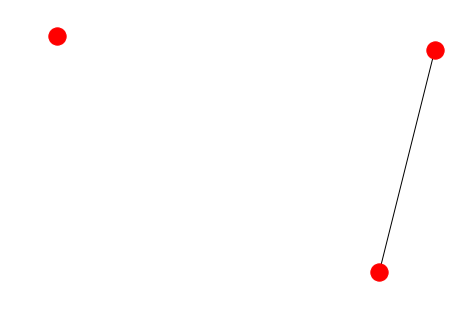

In [60]:
net.draw(b)

# 노드마다 이름 붙이기

In [ ]:
import sys, networkx as nx, matplotlib.pyplot as plt

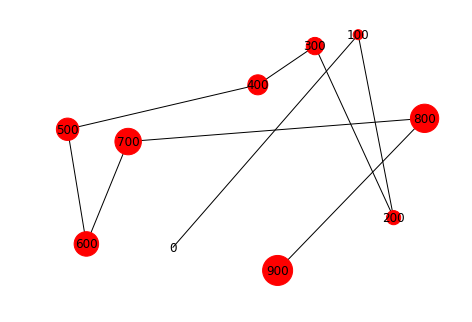

In [56]:
# Create a list of 10 nodes numbered [0, 9]
nodes = range(10)
node_sizes = []
labels = {}
for n in nodes:
        node_sizes.append( 100 * n )
        labels[n] = 100*n

# Node sizes: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Connect each node to its successor
edges = [ (i, i+1) for i in range(len(nodes)-1) ]

# Create the graph and draw it with the node labels
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

nx.draw_random(g, node_size = node_sizes, labels=labels, with_labels=True)    
plt.show()

# 깊이 우선 탐색, 넓이 우선 탐색

In [62]:
import networkx.generators.small as netsmall

In [63]:
g = netsmall.krackhardt_kite_graph()

In [64]:
g.number_of_edges()
g.number_of_nodes()
g.adjacency_list()
g.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [65]:
dict((x, g.neighbors(x)) for x in g.nodes())

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [8, 5, 6],
 8: [9, 7],
 9: [8]}

In [68]:
from networkx.algorithms import traversal

In [74]:
# 깊이 우선 탐색
edges = traversal.dfs_edges(g)
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [77]:
# 넓이 우선 탐색
edges1 = traversal.bfs_edges(g, 0)
list(edges1)

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 4), (1, 6), (5, 7), (7, 8), (8, 9)]

In [78]:
traversal.bfs_successors(g, 0)

{0: [1, 2, 3, 5], 1: [4, 6], 5: [7], 7: [8], 8: [9]}

### 0, 5 

In [79]:
from networkx import algorithms

In [80]:
# 0, 5까지의 최단 거리 탐색
algorithms.shortest_path(g, 0, 5)

[0, 5]

In [81]:
# 0, 7까지의 최단 거리 탐색
algorithms.shortest_path(g, 0, 7)

[0, 5, 7]

In [82]:
algorithms.average_shortest_path_length(g)

1.9777777777777779

In [85]:
algorithms.all_pairs_shortest_path(g)[5]

{0: [5, 0],
 1: [5, 0, 1],
 2: [5, 2],
 3: [5, 3],
 4: [5, 3, 4],
 5: [5],
 6: [5, 6],
 7: [5, 7],
 8: [5, 7, 8],
 9: [5, 7, 8, 9]}

In [86]:
algorithms.dijkstra_path(g, 1, 5)

[1, 0, 5]

In [87]:
# 2개의 노드를 짝지어주는 함수
import itertools
g.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

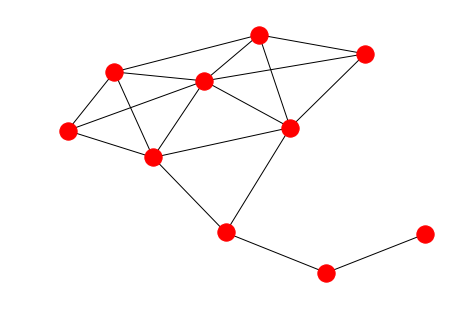

In [94]:
net.draw(g)

In [88]:
list(itertools.combinations(g.nodes(), 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [89]:
nn = g.nodes()
nn[:4]

[0, 1, 2, 3]

In [90]:
pairs = list(itertools.combinations(nn[:4], 2))
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [95]:
# 두 알고리즘 비교?
for pair in itertools.combinations(nn[:8], 2):
    print algorithms.shortest_path(g, *pair), algorithms.dijkstra_path(g, *pair)

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 1, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 5, 7]
[1, 0, 2] [1, 0, 2]
[1, 3] [1, 3]
[1, 4] [1, 4]
[1, 0, 5] [1, 0, 5]
[1, 6] [1, 6]
[1, 6, 7] [1, 6, 7]
[2, 3] [2, 3]
[2, 3, 4] [2, 3, 4]
[2, 5] [2, 5]
[2, 3, 6] [2, 3, 6]
[2, 5, 7] [2, 5, 7]
[3, 4] [3, 4]
[3, 5] [3, 5]
[3, 6] [3, 6]
[3, 5, 7] [3, 5, 7]
[4, 3, 5] [4, 3, 5]
[4, 6] [4, 6]
[4, 6, 7] [4, 6, 7]
[5, 6] [5, 6]
[5, 7] [5, 7]
[6, 7] [6, 7]


In [97]:
from random import choice
import urllib

In [98]:
g = net.Graph()

In [102]:
g.add_edge('a', 'b')
g.add_edge('b', 'c')
g.add_edge('c', 'a')

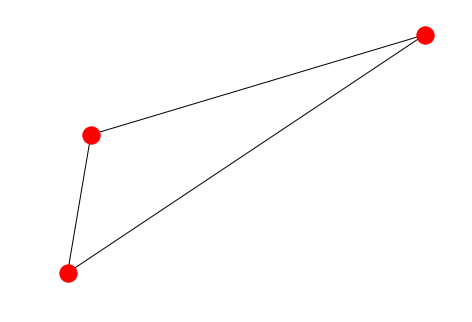

In [103]:
net.draw(g)

In [104]:
g.nodes()

['a', 'c', 'b']

In [105]:
g.edges()

[('a', 'c'), ('a', 'b'), ('c', 'b')]

In [106]:
g.node['a']

{}

In [107]:
g.node['a']['size'] = 1

In [108]:
g.node['a']

{'size': 1}

In [109]:
g['a']

{'b': {}, 'c': {}}

In [110]:
g['a']['b']

{}

In [111]:
g['a']['b']['weight'] = 1